In [24]:
# Install kneed if not already installed
!pip install kneed

In [1]:
import numpy as np
import pandas as pd
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#load in penguin dataset
penguins = pd.read_csv("/Users/vincent/dsi_lcr/LCR/01_materials/notebooks/dataset/penguins.csv")
penguins

,bill_length_mm,flipper_length_mm
0,39.1,181
1,39.5,186
2,40.3,195
3,36.7,193
4,39.3,190
...,...,...
337,55.8,207
338,43.5,202
339,49.6,193
340,50.8,210


In [ ]:
# Display the minimum and maximum values for each feature in the dataset
min_max_values = penguins.agg(['min','max'])
min_max_values

,bill_length_mm,flipper_length_mm
min,32.1,172
max,59.6,231


In [7]:
#preprocess
penguins_copy = penguins.copy()
scaler = StandardScaler()
standardized_penguins = scaler.fit_transform(penguins_copy)
standardized_penguins = pd.DataFrame(standardized_penguins, columns=penguins_copy.columns)
standardized_penguins

,bill_length_mm,flipper_length_mm
0,-0.884499,-1.418347
1,-0.811126,-1.062250
2,-0.664380,-0.421277
3,-1.324737,-0.563715
4,-0.847812,-0.777373
...,...,...
337,2.178824,0.433355
338,-0.077396,0.077258
339,1.041543,-0.563715
340,1.261662,0.647013


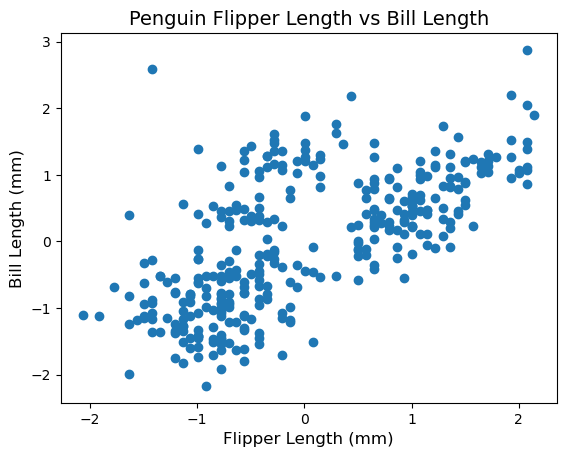

In [9]:
#visualize our data
# Scatter plot for bill_length_mm vs flipper_length_mm
plt.scatter(standardized_penguins['flipper_length_mm'], standardized_penguins['bill_length_mm'])

# Adding labels and title
plt.title('Penguin Flipper Length vs Bill Length', fontsize=14)
plt.ylabel('Bill Length (mm)', fontsize=12)
plt.xlabel('Flipper Length (mm)', fontsize=12)

# Display the plot
plt.show()

In [14]:
#perform k-mean clustering
kmeans = KMeans(n_clusters=5, random_state=123, n_init=10)

In [15]:
clusters = kmeans.fit(standardized_penguins)

In [16]:
standardized_penguins_with_clusters = standardized_penguins.copy()
standardized_penguins_with_clusters["Cluster"] = clusters.labels_
standardized_penguins_with_clusters

,bill_length_mm,flipper_length_mm,Cluster
0,-0.884499,-1.418347,1
1,-0.811126,-1.062250,1
2,-0.664380,-0.421277,4
3,-1.324737,-0.563715,1
4,-0.847812,-0.777373,1
...,...,...,...
337,2.178824,0.433355,0
338,-0.077396,0.077258,4
339,1.041543,-0.563715,0
340,1.261662,0.647013,0


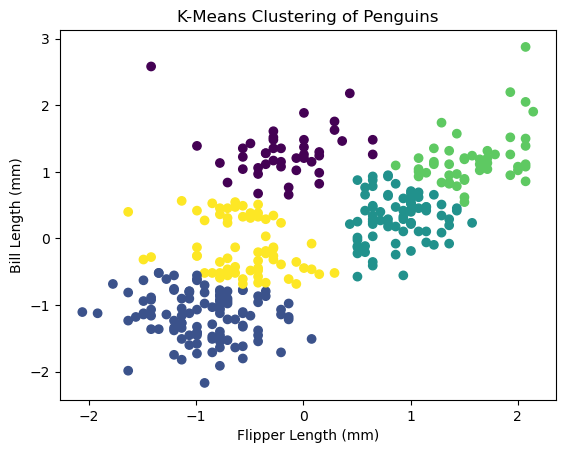

In [17]:
# Plot the clusters
plt.scatter(standardized_penguins_with_clusters['flipper_length_mm'], standardized_penguins_with_clusters['bill_length_mm'], c=standardized_penguins_with_clusters['Cluster'])
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Length (mm)')
plt.title('K-Means Clustering of Penguins')
plt.show()

In [ ]:
# Get the inertia (sum of squared distances to nearest cluster center)
# In other words 91.47 when k=5 is the number that tells us how tightly the clusters are packed together.
clusters.inertia_

91.47610853298528

In [ ]:
# Create a DataFrame to store k values and their corresponding WSSD (within-cluster sum of squared distances)
# For each k value, we have the corresponding WSSD (within-cluster sum of squared distances)
# to determine the elbow point or the optimal number of clusters
penguin_clust_ks = pd.DataFrame(columns=["k","wssd"])

# Loop through k values from 1 to 10
for k in range(1,11):
    # Initialize the model for current k
    elbow_kmeans = KMeans(n_clusters=k, random_state=123, n_init=10)
    
    # Fit the model and get the inertia (WSSD) using the standardized penguin dataset
    elbow_kmeans.fit(standardized_penguins)

    # Create a DataFrame for the current k and its WSSD, then append it to the main DataFrame 
    current_k = pd.DataFrame({"k":[k], "wssd": [elbow_kmeans.inertia_]})

    # Concatenate the current k DataFrame to the main DataFrame
    # Iqnore the index to avoid duplicate indices to avoid confusion with plotting
    penguin_clust_ks = pd.concat([penguin_clust_ks, current_k], ignore_index = True)

/var/folders/5h/h1f0cx75553g3c45m_p5b0k80000gn/T/ipykernel_52691/3636605803.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  penguin_clust_ks = pd.concat([penguin_clust_ks, current_k], ignore_index = True)


In [ ]:
# For each k value, we have the corresponding WSSD (within-cluster sum of squared distances)
# to determine the elbow point or the optimal number of clusters
penguin_clust_ks

,k,wssd
0,1,684.000000
1,2,247.016625
2,3,157.815322
3,4,118.766244
4,5,91.476109
5,6,78.716593
6,7,66.722277
7,8,57.914115
8,9,52.458720
9,10,48.642403


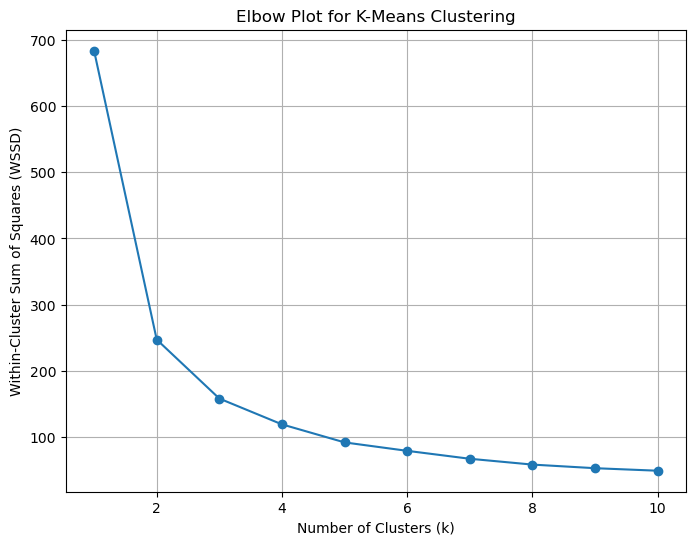

In [22]:
# Create the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(penguin_clust_ks['k'], penguin_clust_ks['wssd'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSSD)')
plt.title('Elbow Plot for K-Means Clustering')
#plt.xticks(penguin_clust_ks['k'])  # Optional: to ensure all k values are shown on the x-axis
plt.grid(True)
plt.show()

In [32]:
# Ensure columns are numeric and drop NaNs before using KneeLocator
penguin_clust_ks['k'] = pd.to_numeric(penguin_clust_ks['k'], errors='coerce')
penguin_clust_ks['wssd'] = pd.to_numeric(penguin_clust_ks['wssd'], errors='coerce')
penguin_clust_ks = penguin_clust_ks.dropna(subset=['k', 'wssd'])

In [33]:
# Check the types and values of the columns before using KneeLocator
print('k dtype:', penguin_clust_ks['k'].dtype)
print('wssd dtype:', penguin_clust_ks['wssd'].dtype)
print('Any NaNs in k?', penguin_clust_ks['k'].isna().any())
print('Any NaNs in wssd?', penguin_clust_ks['wssd'].isna().any())
print('k values:', penguin_clust_ks['k'].tolist())
print('wssd values:', penguin_clust_ks['wssd'].tolist())

k dtype: int64
wssd dtype: float64
Any NaNs in k? False
Any NaNs in wssd? False
k values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
wssd values: [684.0000000000002, 247.01662532441628, 157.81532187523783, 118.76624365102077, 91.47610853298528, 78.716593442611, 66.72227679473986, 57.91411488194744, 52.45872030214002, 48.64240277282278]


In [34]:
# Determine the optimal number of clusters from the elbow plot
# The elbow point is where the WSSD starts to decrease at a slower rate
# In this case, it appears to be around k=5 but use method like the "knee" locator for more precision
# Use the knee locator method from the kneed library for a more precise determination of the elbow point
from kneed import KneeLocator
knee_locator = KneeLocator(penguin_clust_ks['k'], penguin_clust_ks['wssd'], curve='convex', direction='decreasing')
optimal_k = knee_locator.knee
optimal_k

3

In [45]:
# Use the optimal k to fit the final KMeans model and visualize the clusters
final_kmeans = KMeans(n_clusters=optimal_k, random_state=123, n_init=10)
final_clusters = final_kmeans.fit(standardized_penguins)
standardized_penguins_with_final_clusters = standardized_penguins.copy()
standardized_penguins_with_final_clusters["Cluster"] = final_clusters.labels_
standardized_penguins_with_final_clusters



,bill_length_mm,flipper_length_mm,Cluster
0,-0.884499,-1.418347,1
1,-0.811126,-1.062250,1
2,-0.664380,-0.421277,1
3,-1.324737,-0.563715,1
4,-0.847812,-0.777373,1
...,...,...,...
337,2.178824,0.433355,2
338,-0.077396,0.077258,2
339,1.041543,-0.563715,2
340,1.261662,0.647013,0


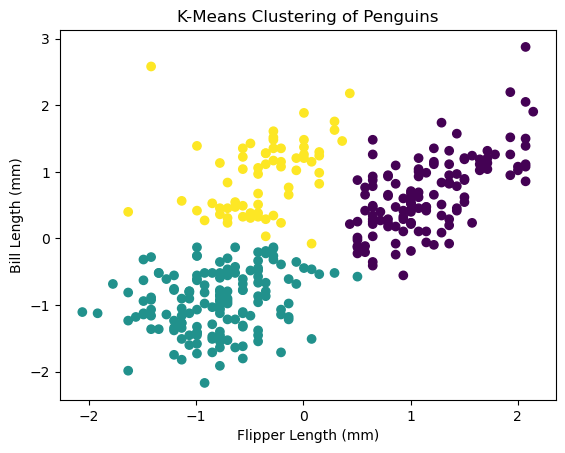

In [46]:
# Visualize the final clusters
# Plot the clusters
plt.scatter(standardized_penguins_with_final_clusters['flipper_length_mm'], standardized_penguins_with_final_clusters['bill_length_mm'], c=standardized_penguins_with_final_clusters['Cluster'])
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Length (mm)')
plt.title('K-Means Clustering of Penguins')
plt.show()